*Here the attempt has been made to do initial data exploratory analysis and then depending on understading of data,*
*perform data cleaning*

In [77]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [78]:
#reading csv
df1 = pd.read_csv("..\data\AB_NYC_2019.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Categorical Variable types we have are:
1. host_name
2. neighbourhood_group
3. neighbourhood
4. room_type(private,shared,Entire home/apt)

In [79]:
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [80]:
df1.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [81]:
df1.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<sub> null values are in both review labels, name and hostname
and those variables don't seem to be useful for us </sub>

In [82]:
mean = df1['reviews_per_month'].mean()
df1['reviews_per_month'].fillna(mean, inplace=True)

In [83]:
#dropping columns
df_price = df1['price'].to_list
df1= df1.drop(['name', 'id', 'host_name', 'last_review'],axis=1,)

In [84]:
df1.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [85]:
ng_p=df1.groupby("neighbourhood_group")["price"].mean()
ng_p

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

In [86]:
df1["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Average price is 152, it varies from 0 to 10k bucks

In [87]:
host_id_counts = df1["host_id"].value_counts()
max_host = host_id_counts.idxmax()
max_host
#the host with most listings

219517861

This popular host is a startup company Sonder, which explains why they have the most listings

In [88]:
df1 = df1.loc[~(df1['availability_365']==0)]

In [89]:
df1["availability_365"].describe()
#histogram of 365 availability is done below

count    31362.000000
mean       175.831994
std        126.187636
min          1.000000
25%         55.000000
50%        168.000000
75%        305.000000
max        365.000000
Name: availability_365, dtype: float64

In [90]:
BUCKET_S = (max(df1["availability_365"]) -  min(df1["availability_365"]))/24 + 2
print('Bucket:', BUCKET_S)
#a365 = np.array(df1['availability_365']).flatten()
a365 = []
for day in df1['availability_365']:
    if day <= BUCKET_S: #2week
        day = 0
        a365.append(day)
    elif day <= 2*BUCKET_S: #1month
        day = 1
        a365.append(day)
    elif day <= 6*BUCKET_S: #3month
        day = 2
        a365.append(day)
    elif day <= 12*BUCKET_S: #6month
        day = 3
        a365.append(day)
    elif day <= 18*BUCKET_S: #9month
        day = 4
        a365.append(day)
    elif day <= 24*BUCKET_S: #12month
        day = 5
        a365.append(day)

Bucket: 17.166666666666664


In [91]:
a365n = np.array(a365)
a3pd = pd.DataFrame(a365n)

In [92]:
df1 = df1.drop(['availability_365'],axis=1)
df1 = pd.concat([df1, a3pd], axis=1)

In [93]:
df1 = df1.dropna()
df1.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
0                                 0
dtype: int64

In [94]:
df1 = df1.rename(columns = {0:"availability_365"})

In [95]:
df1["availability_365"].describe()

count    16902.000000
mean         2.989055
std          1.641407
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: availability_365, dtype: float64

# Plotting graphs and more analysis

<AxesSubplot:>

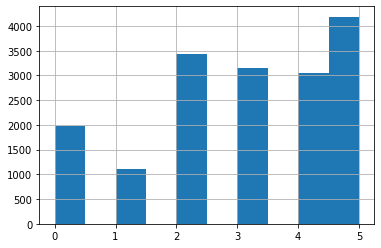

In [96]:
hist_av=df1["availability_365"].hist()
hist_av

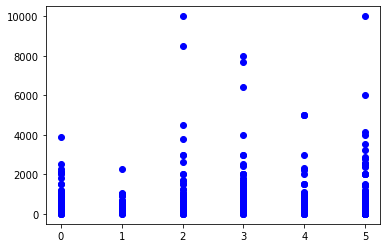

In [97]:
plt.scatter(df1["availability_365"], df1["price"], color='blue')

In [98]:
df1["minimum_nights"].corr(df1["price"])

0.02790107901721157

In [99]:
ng_price=df1.groupby("neighbourhood_group")["price"].mean()
ng_price

neighbourhood_group
Bronx             89.963218
Brooklyn         136.304176
Manhattan        201.931572
Queens            99.875120
Staten Island    127.633721
Name: price, dtype: float64

In [100]:
rt_price = df1.groupby("room_type")["price"].mean()
rt_price

room_type
Entire home/apt    213.289359
Private room        92.817442
Shared room         76.360502
Name: price, dtype: float64

Shared is cheapest, then followed by private and then entire apartment

C:\Users\Eshan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Neighbourhood Group')

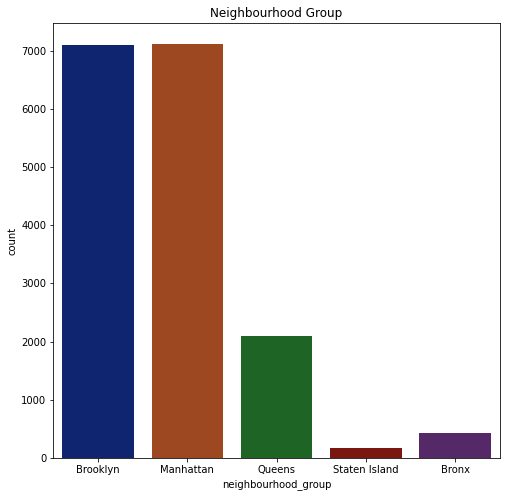

In [101]:
sns.countplot(df1['neighbourhood_group'], palette="dark")
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.title('Neighbourhood Group')

Brooklyn, Manhattan conntain most of the listings

<AxesSubplot:>

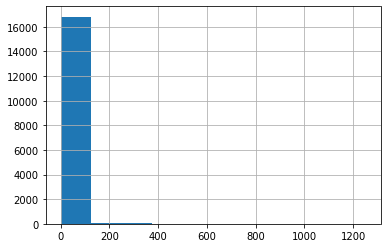

In [102]:
hist_mn=df1["minimum_nights"].hist()
hist_mn

<AxesSubplot:>

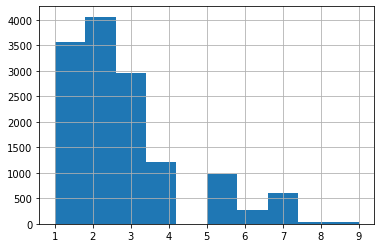

In [103]:
hist_mn1=df1["minimum_nights"][df1["minimum_nights"]<10].hist()
hist_mn1

good treshold for min nights can be 10

In [104]:
df1["availability_365"].corr(df1["price"])

0.015030288200512462

Text(0.5, 1.0, 'Minimum Nights vs Price vs Room Type')

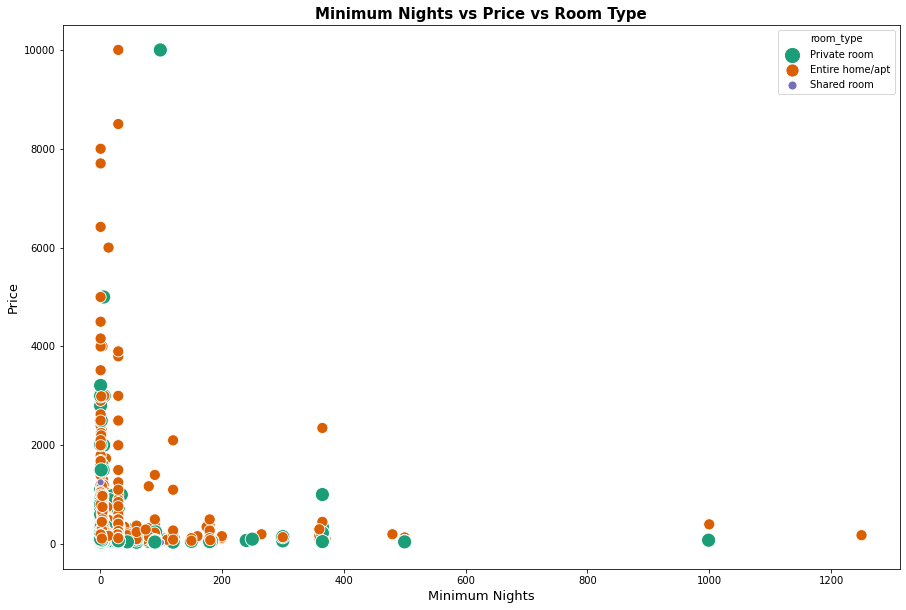

In [105]:
#min nights vs room type vs price
plt.figure(figsize=(15,10))
sns.scatterplot(x="minimum_nights", y="price",
            hue="room_type", size="room_type",
            sizes=(50, 200), palette="Dark2", data=df1)

plt.xlabel("Minimum Nights", size=13)
plt.ylabel("Price", size=13)
plt.title("Minimum Nights vs Price vs Room Type",size=15, weight='bold')

Text(0.5, 1.0, 'Minimum nights vs Price vs Availability 365')

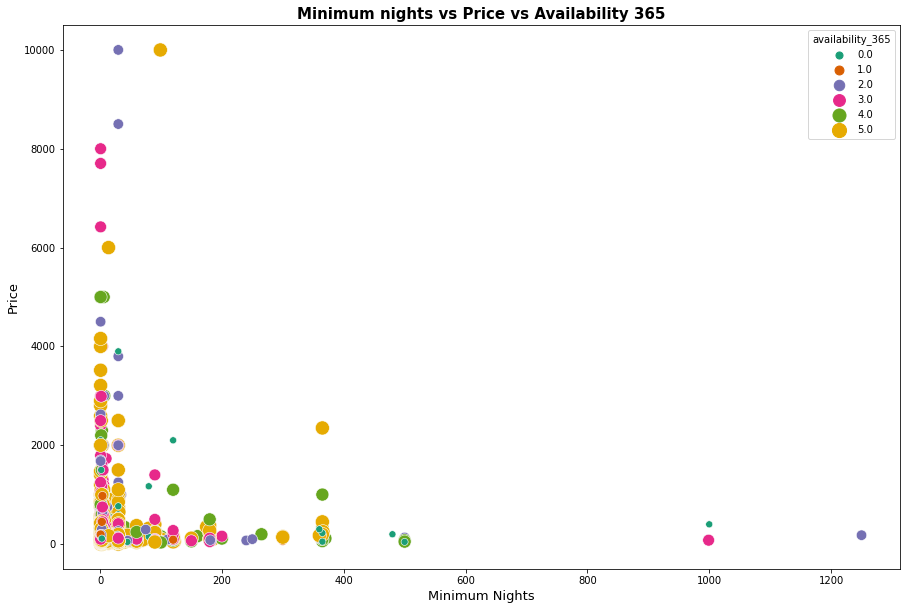

In [106]:
#min nights vs 365 vs price
plt.figure(figsize=(15,10))
sns.scatterplot(x="minimum_nights", y="price",
            hue="availability_365", size="availability_365",
            sizes=(50, 200), palette="Dark2", data=df1)

plt.xlabel("Minimum Nights", size=13)
plt.ylabel("Price", size=13)
plt.title("Minimum nights vs Price vs Availability 365",size=15, weight='bold')

We can see that most dense area is with low price (upto 4k), and minimum nights being under 200. For availability365 we can see that occurences outside this dense are with 6month, 9month, 12month availability

Text(0.5, 1.0, 'Room Type vs Price')

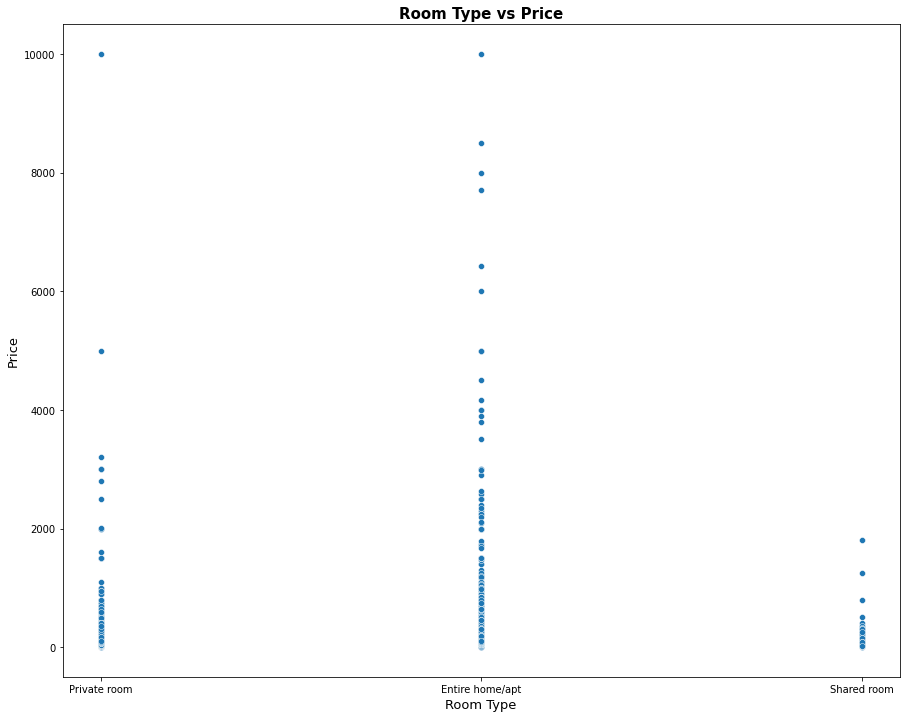

In [107]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='room_type', y='price', data=df1)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price",size=15, weight='bold')

1. Shared room is concentrated towards the bottom end of spectrum
2. Private room also follows the same trend but has a higher maximum comparatively
3. Renting entire apartment obviously has a maximum higher than others and has more values towards the higher end

Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

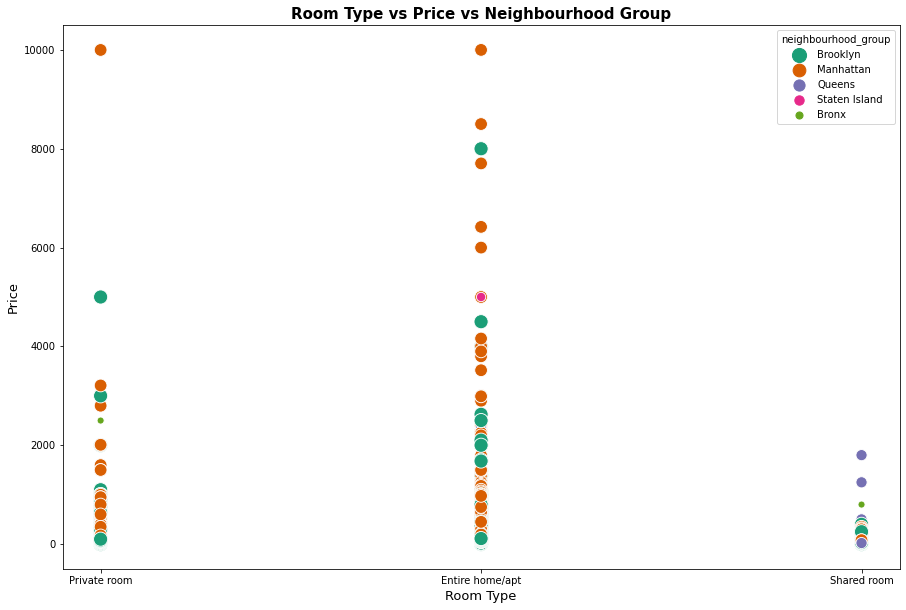

In [108]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group", size="neighbourhood_group",
            sizes=(50, 200), palette="Dark2", data=df1)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')

Text(0.5, 1.0, 'Number of Reviews vs Price')

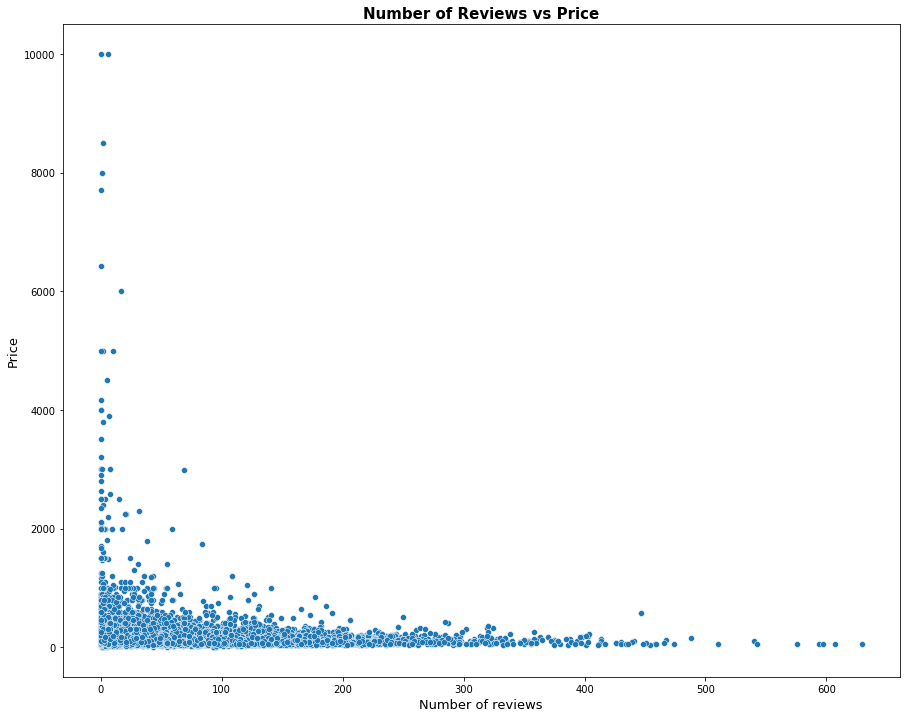

In [109]:
#number of reviews vs price
plt.figure(figsize=(15,12))
sns.scatterplot(x='number_of_reviews', y='price', data=df1)

plt.xlabel("Number of reviews", size=13)
plt.ylabel("Price", size=13)
plt.title("Number of Reviews vs Price",size=15, weight='bold')

In [110]:
df1["number_of_reviews"].corr(df1["price"])

-0.08269065098398815

In [111]:
df1["reviews_per_month"].corr(df1["price"])

-0.07154316986013451

Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

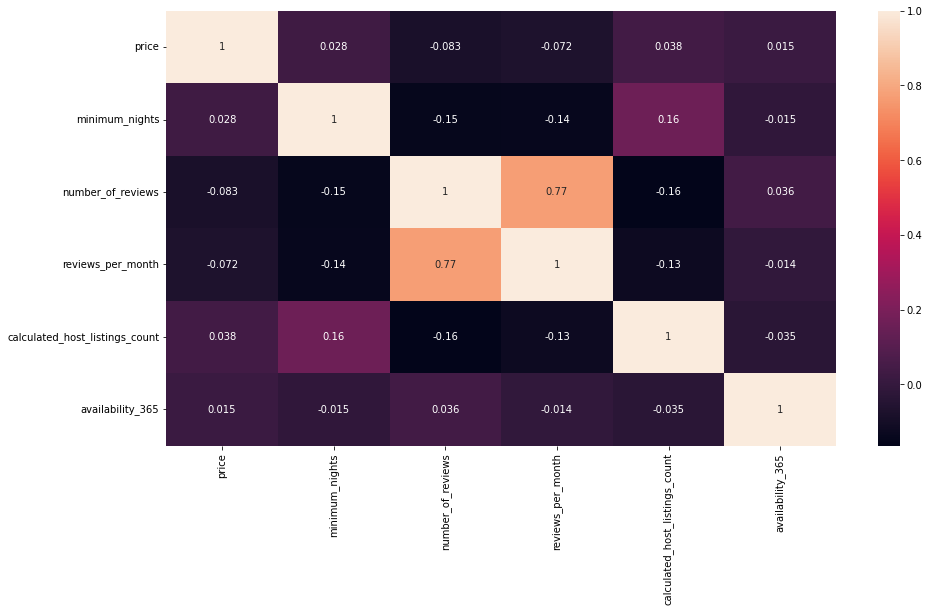

In [112]:
#drop more columns before correlation matrix with pearson method
#we cannot really use host_id for modelling
df1 = df1.drop(["host_id","latitude","longitude","neighbourhood"], axis=1)
corr = df1.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df1.columns

In [113]:
df1['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [114]:
# do categorial data handling here
df1_1h2 = pd.get_dummies(df1, columns=['neighbourhood_group',"room_type"], prefix = ['ng',"rt"],drop_first=True)

In [115]:
df1_1h2.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,ng_Brooklyn,ng_Manhattan,ng_Queens,ng_Staten Island,rt_Private room,rt_Shared room
0,149.0,1.0,9.0,0.210000,6.0,5.0,1,0,0,0,1,0
1,225.0,1.0,45.0,0.380000,2.0,5.0,0,1,0,0,0,0
2,150.0,3.0,0.0,1.373221,1.0,5.0,0,1,0,0,1,0
3,89.0,1.0,270.0,4.640000,1.0,3.0,1,0,0,0,0,0
5,200.0,3.0,74.0,0.590000,1.0,4.0,0,1,0,0,0,0


In [116]:
# objCol = df1.dtypes[df1.dtypes == "object"].index.values
# for col in objCol:
#     tempDic = {}
#     t = df1[col].unique().tolist()
#     for val,key in enumerate(t):
#         tempDic[key]=val
#     print('{}\t{}'.format(col,tempDic))
#     df1[col]=df1[col].map(tempDic)

**Exporting data**

In [117]:
#exporting final to data folder
df1.to_csv("../data/abnyc_final.csv", index=False)

In [118]:

#going forward with this as of now
#Shuffle your dataset 

# shuffle_df = df1_1h2.sample(frac=1)

# # Define a size for your train set 
# train_size = int(0.7 * len(df1_1h2))
# test_size = int(0.5 * 0.3 * len(df1_1h2))

# # Split your dataset 
# train_set = shuffle_df[:train_size]
# temp_set = shuffle_df[train_size:]

# validation_set = temp_set[test_size:]
# test_set = temp_set[test_size:]

In [119]:
# # handler function
# def col_name_based_on_type(dataframe, datatype):
#     cols = []
#     for col in dataframe:
#         if str(dataframe[col].dtypes) == datatype:
#             cols.append(col)
#     return cols

In [120]:
# fit_float = df1.drop(col_name_based_on_type(df1, 'float64'), axis=1)
# fit_int = df1.drop(col_name_based_on_type(df1, 'int64'), axis=1)

In [121]:
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(df1_1h2)

minmax_df = pd.DataFrame(minmax_df, columns = df1_1h2.columns)

# scaler = StandardScaler()
# robust_df = scaler.fit_transform(df1_1h2)

# for fit in [fit_float, fit_int]:
#     fit = scaler.fit_transform(fit)

# df1 = pd.concat([fit_float, fit_int], axis=1, join="inner")

In [122]:
minmax_df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,ng_Brooklyn,ng_Manhattan,ng_Queens,ng_Staten Island,rt_Private room,rt_Shared room
0,0.0149,0.000000,0.014308,0.010132,0.021645,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0225,0.000000,0.071542,0.018744,0.004329,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0150,0.001601,0.000000,0.069059,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0089,0.000000,0.429253,0.234549,0.000000,0.6,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0200,0.001601,0.117647,0.029382,0.000000,0.8,0.0,1.0,0.0,0.0,0.0,0.0


In [128]:
#dataY = df1['price']
#dataX = df1.drop(['price'], axis=1)
dataY = df1_1h2['price']
dataX = minmax_df.drop(['price'], axis=1)
x_train, x_test_val, y_train, y_test_val = train_test_split(dataX, dataY, test_size=0.3)
x_val, x_test, y_val, y_test = train_test_split(x_test_val, y_test_val, test_size=0.5) 

In [129]:
dataX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16902 entries, 0 to 16901
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   minimum_nights                  16902 non-null  float64
 1   number_of_reviews               16902 non-null  float64
 2   reviews_per_month               16902 non-null  float64
 3   calculated_host_listings_count  16902 non-null  float64
 4   availability_365                16902 non-null  float64
 5   ng_Brooklyn                     16902 non-null  float64
 6   ng_Manhattan                    16902 non-null  float64
 7   ng_Queens                       16902 non-null  float64
 8   ng_Staten Island                16902 non-null  float64
 9   rt_Private room                 16902 non-null  float64
 10  rt_Shared room                  16902 non-null  float64
dtypes: float64(11)
memory usage: 1.4 MB


In [130]:
dataX.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,ng_Brooklyn,ng_Manhattan,ng_Queens,ng_Staten Island,rt_Private room,rt_Shared room
0,0.000000,0.014308,0.010132,0.021645,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.071542,0.018744,0.004329,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.001601,0.000000,0.069059,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.000000,0.429253,0.234549,0.000000,0.6,1.0,0.0,0.0,0.0,0.0,0.0
4,0.001601,0.117647,0.029382,0.000000,0.8,0.0,1.0,0.0,0.0,0.0,0.0


In [131]:
'''train_set.to_csv("../input/abnyc_train.csv", index=False)
test_set.to_csv("../input/abnyc_test.csv", index=False)
validation_set.to_csv("../input/abnyc_validation.csv", index=False)'''

'train_set.to_csv("../input/abnyc_train.csv", index=False)\ntest_set.to_csv("../input/abnyc_test.csv", index=False)\nvalidation_set.to_csv("../input/abnyc_validation.csv", index=False)'

In [132]:
#exporting train test split
x_train.to_csv("../input/x_train.csv", index=False)
y_train.to_csv("../input/y_train.csv", index=False)
x_val.to_csv("../input/x_val.csv", index=False)
y_val.to_csv("../input/y_val.csv", index=False)
x_test.to_csv("../input/x_test.csv", index=False)
y_test.to_csv("../input/y_test.csv", index=False)